# 4. Summarize and visualize info from student questions

December 22, 2024

This notebook summarizes and visualizes the student responses (including internship, if applicable).


## Setup

To learn more, see notebook #1


In [1]:
import os

# Set working directory to root of project
current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

from pprint import pprint
from src.plotter import Plotter
from src.respondent import Respondent
from src.analyst import Analyst
import src.utils as utils

from IPython import get_ipython

# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


In [2]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

## Example of a student respondent

In [5]:
resp_test = analyst.respondents_list[617]

# View summary as set by `__repr__`
resp_test
resp_test.student

{'student_sentiment': {'keys': ['After graduating, I know what role(s) to apply to',
   'After graduating, I will find a job',
   'By the time I graduate, I will have learned the skills needed to find a job',
   'I am optimistic about the future of the battery industry'],
  'values': array([3., 5., 4., 4.])},
 'ideal_job_title': 'Principal scientist',
 'ideal_value_chain': ['Component/precursor production',
  'Cell production',
  'Consulting'],
 'ideal_job_aspects': ['Competitive salary and benefits',
  'Challenge and innovation',
  'Work-life balance',
  'Autonomy and independence',
  'Learning and skills development',
  'Career growth opportunities',
  'Desirable work location',
  'Sustainability and impact',
  'Supportive team and environment'],
 'ideal_salary': np.float64(70000.0),
 'num_internships': '5+',
 'internship_value_chain': [],
 'internship_role': ['Engineering and design',
  'Research and development',
  'Managing projects or programs',
  'Legal'],
 'internship_top_skill

## Summary of results

In [3]:
# Summarize student sentiment
res = analyst.summarize_student_sentiment()
res

{'keys': ['After graduating, I know what role(s) to apply to',
  'After graduating, I will find a job',
  'By the time I graduate, I will have learned the skills needed to find a job',
  'I am optimistic about the future of the battery industry'],
 'values': array([[ 5.,  3.,  4.,  4.],
        [ 5.,  4.,  5.,  5.],
        [ 4.,  5.,  5.,  5.],
        [ 3.,  3.,  3.,  5.],
        [ 3.,  2.,  2.,  4.],
        [ 3.,  3.,  3.,  5.],
        [ 1.,  2.,  2.,  2.],
        [ 3.,  3.,  2.,  4.],
        [ 2.,  4.,  4.,  5.],
        [ 3.,  2.,  2.,  4.],
        [ 5.,  5.,  4.,  5.],
        [ 4.,  2.,  4.,  5.],
        [ 4.,  5.,  2.,  3.],
        [ 4.,  5.,  3.,  5.],
        [ 1.,  2.,  3.,  1.],
        [ 5.,  4.,  3.,  4.],
        [ 5.,  3.,  4.,  5.],
        [ 5.,  3.,  5.,  5.],
        [ 4.,  4.,  4.,  1.],
        [ 5.,  5.,  5.,  5.],
        [ 4.,  3.,  4.,  4.],
        [ 2.,  4.,  4.,  5.],
        [ 5.,  5.,  5.,  5.],
        [ 4.,  3.,  3.,  3.],
        [ 5.,  5.,  5.

In [6]:
# Summary of student ideal career post-graduation
res_ideal = analyst.summarize_student_ideal()
pprint(res_ideal)

{'ideal_job_aspects': {'Autonomy and independence': 21,
                       'Career growth opportunities': 61,
                       'Challenge and innovation': 52,
                       'Competitive salary and benefits': 59,
                       'Desirable work location': 30,
                       'Hybrid/remote work': 13,
                       'Job security': 41,
                       'Learning and skills development': 52,
                       'Supportive team and environment': 51,
                       'Sustainability and impact': 35,
                       'Work-life balance': 47,
                       '_tot_': 79},
 'ideal_salary_list': array([1.40e+05, 1.20e+05, 1.10e+05, 4.00e+03, 8.00e+04, 1.00e+08,
       1.20e+05, 1.15e+05, 1.50e+05, 2.00e+05, 1.70e+05, 5.00e+03,
       9.50e+04, 1.20e+05, 1.50e+05, 4.00e+04, 8.00e+04, 1.00e+05,
       1.50e+06, 1.20e+05, 5.00e+07, 1.20e+06, 1.20e+05, 8.00e+04,
       1.00e+05, 1.20e+05, 3.20e+04, 9.50e+04, 1.00e+05, 8.50e+04,
 

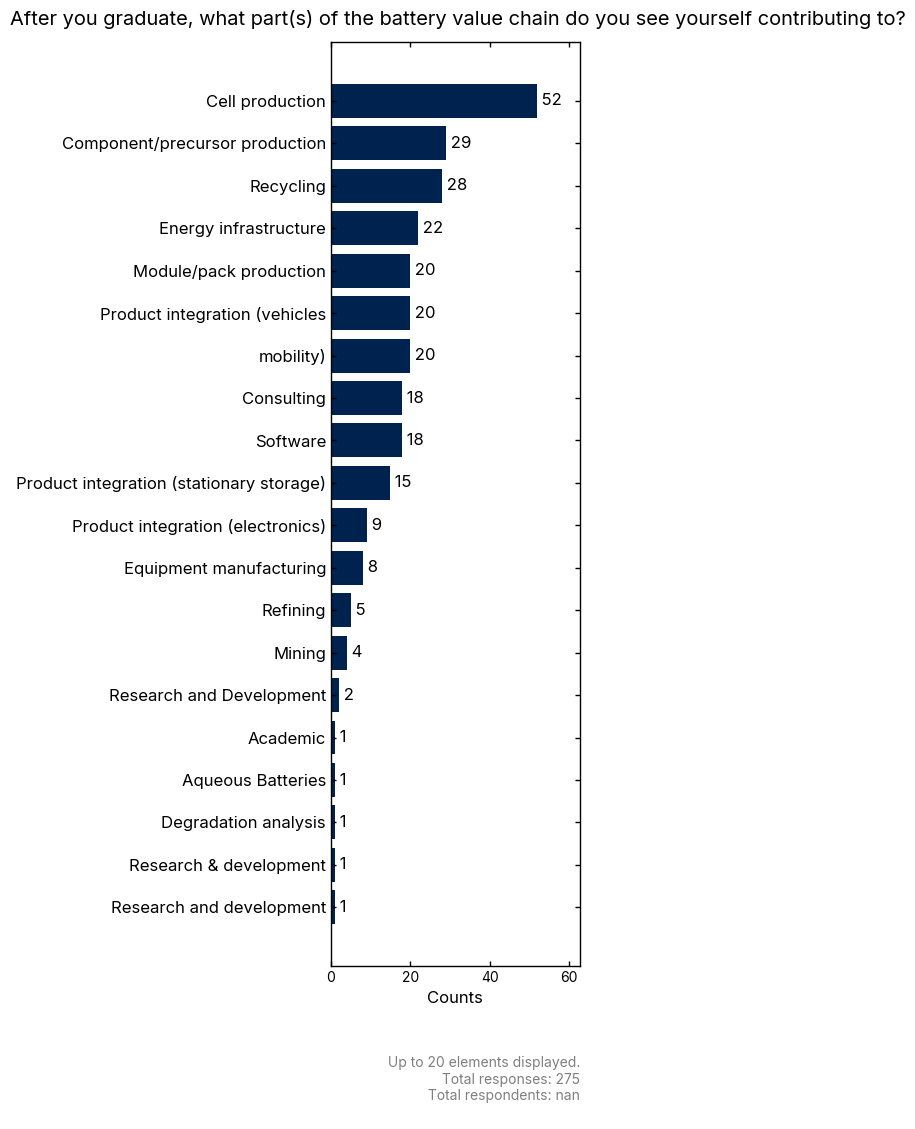

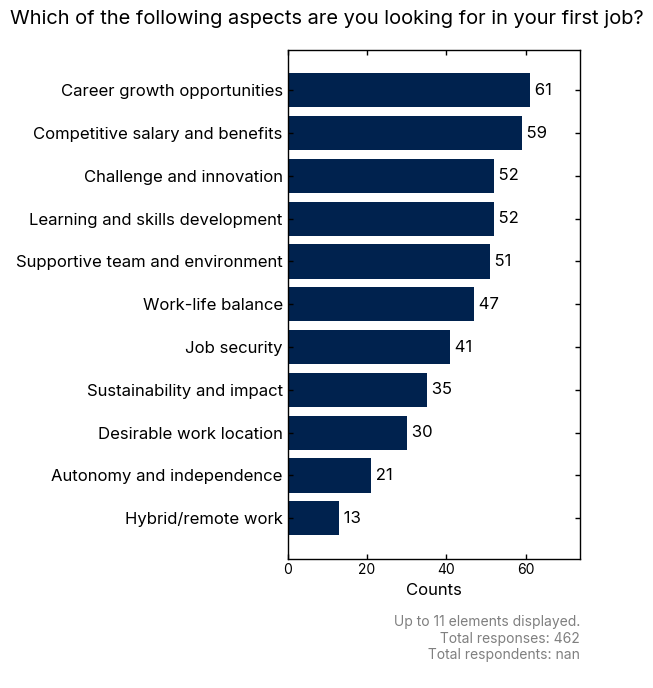

In [12]:
# Plot results
plotter = Plotter()

# Ideal value chain
plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_ideal['ideal_value_chain'], by='keys', reverse=False),
    title='After you graduate, what part(s) of the battery value chain do you see yourself contributing to?',
    saveas='student_ideal_vc.png',
    num_elements=20,
    sorted=True
)

# Ideal job aspects
plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_ideal['ideal_job_aspects'], by='keys', reverse=False),
    title='Which of the following aspects are you looking for in your first job?',
    saveas='student_ideal_job_aspect.png',
    num_elements=11,
    sorted=True
)

In [14]:
# Ideal salary
salary_list = res_ideal['ideal_salary_list']
salary_list

array([1.40e+05, 1.20e+05, 1.10e+05, 4.00e+03, 8.00e+04, 1.00e+08,
       1.20e+05, 1.15e+05, 1.50e+05, 2.00e+05, 1.70e+05, 5.00e+03,
       9.50e+04, 1.20e+05, 1.50e+05, 4.00e+04, 8.00e+04, 1.00e+05,
       1.50e+06, 1.20e+05, 5.00e+07, 1.20e+06, 1.20e+05, 8.00e+04,
       1.00e+05, 1.20e+05, 3.20e+04, 9.50e+04, 1.00e+05, 8.50e+04,
       1.20e+05, 1.00e+05, 5.50e+04, 1.20e+05, 5.00e+04, 1.00e+05,
       1.50e+05, 1.20e+05, 9.50e+05, 1.50e+06, 5.00e+04, 1.50e+06,
       1.20e+04, 1.05e+05, 8.50e+04, 1.00e+05, 1.40e+05, 7.00e+04,
       8.00e+04, 7.00e+04, 3.50e+04, 1.35e+05, 1.10e+05, 2.00e+05,
       1.50e+05, 1.50e+08, 1.20e+05, 5.00e+04, 8.00e+04, 3.36e+04,
       1.20e+05, 1.00e+05, 7.00e+04, 9.50e+04, 9.00e+04, 1.20e+05,
       2.00e+06, 6.00e+04, 1.20e+05, 1.20e+05, 1.00e+03, 7.70e+03,
       1.80e+05, 1.00e+05, 1.50e+05])

In [15]:
res_ideal['ideal_salary_mean']

np.float64(4201004.0)

In [16]:
res_ideal['ideal_salary_std']

np.float64(21194407.077544082)

# Work in progress for analysing student data
resp_students = analyst.filter_respondents_on(is_student=True,state='MI')
mydict = analyst.summarize_census_sentiment(resp_students)
mydict['values'].shape
mydict = analyst.summarize_census_backgrounds(resp_students)
mydict
resp_worker = analyst.filter_respondents_on(is_working=True)
analyst.summarize_company_retention()

# Initialize plotter
plotter = Plotter()